In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads')

In [2]:
import pandas as pd
import numpy as np
import os
from utils.config import Config
test_config = Config()
from dataset.train_dataset import train_dataset

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from tensorflow import keras 

In [4]:
dataset = train_dataset(test_config)

In [5]:
hands_dataset,feet_dataset,hands_dataset_val,feet_dataset_val = dataset.initialize_pipeline()

In [6]:
feet_dataset

<PrefetchDataset shapes: ((None, 512, 378, 1), (None, 13)), types: (tf.float32, tf.int64)>

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(test_config.img_height,test_config.img_width ,1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(13)
])

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 378, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 189, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 189, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 94, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 94, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 47, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 192512)            0

In [11]:
history = model.fit(
    feet_dataset,validation_data=feet_dataset_val,epochs=10, steps_per_epoch=150,
    validation_steps=2
)

Train for 150 steps, validate for 2 steps
Epoch 1/10
150/150 [==============================] - 21s 140ms/step - loss: 4.3633 - val_loss: 8.1709
Epoch 2/10
150/150 [==============================] - 8s 56ms/step - loss: 3.3439 - val_loss: 9.6091
Epoch 3/10
150/150 [==============================] - 8s 55ms/step - loss: 1.2166 - val_loss: 9.9967
Epoch 4/10
150/150 [==============================] - 8s 54ms/step - loss: 0.4640 - val_loss: 10.0859
Epoch 5/10
150/150 [==============================] - 9s 59ms/step - loss: 0.2613 - val_loss: 9.6114
Epoch 6/10
150/150 [==============================] - 8s 56ms/step - loss: 0.2110 - val_loss: 9.9599
Epoch 7/10
150/150 [==============================] - 9s 58ms/step - loss: 0.0788 - val_loss: 9.9712
Epoch 8/10
150/150 [==============================] - 8s 57ms/step - loss: 0.0693 - val_loss: 9.9525
Epoch 9/10
150/150 [==============================] - 8s 54ms/step - loss: 0.0520 - val_loss: 9.9558
Epoch 10/10
150/150 [=========================

In [12]:
model.predict(feet_dataset_val,steps = 10)

array([[ 2.7305044e-02, -8.5796462e-03, -2.0947665e-02, ...,
        -1.4597829e-03, -3.6527999e-02, -1.4274938e-01],
       [ 3.8293455e-02, -1.3402656e-01,  1.2262772e-01, ...,
        -6.7520469e-02, -1.1284705e-03,  1.3713335e-01],
       [ 9.4620657e-01,  1.1069419e+00,  5.9378916e-01, ...,
         2.9785726e-03, -1.7029848e-03,  6.9757247e+00],
       ...,
       [ 2.3065478e-01,  3.0672732e-01,  5.0805718e-02, ...,
         1.2118118e+00,  1.2557801e+00,  5.8016024e+00],
       [ 7.5604916e-01,  4.9919095e-02, -1.1547043e-02, ...,
         4.5303963e-02, -3.4025177e-01,  1.3187482e+00],
       [ 3.8293455e-02, -1.3402656e-01,  1.2262772e-01, ...,
        -6.7520469e-02, -1.1284705e-03,  1.3713335e-01]], dtype=float32)

tf.Tensor([ 0  0  2  2  2  4  0  3  3  2  3  2 23], shape=(13,), dtype=int64)
[[ 0.06868779  0.5297464   0.03455839  0.5211778   0.16195777  1.0112051
  -0.5428988   0.7987013  -0.4949452  -0.4075543  -0.23366548  0.2724572
   1.5035818 ]]
Image shape:  (25, 512, 378, 1)
Label:  [[ 0  0  2  2  2  4  0  3  3  2  3  2 23]
 [ 0  0  2  2  2  4  0  3  3  2  3  2 23]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  4  4  4  4  3  2  4  4  4  4 43]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  2]
 [ 0  0  2  1  0  2  2  0  0  0  0  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  2  4]
 [ 0  0  1  2  0  0  2  2  2  2  2  2 15]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  4  4  4  4  3  2  4  4  4  4 43]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 0  

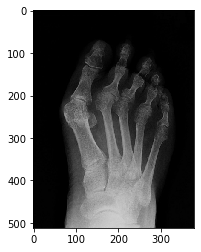

In [15]:
for image, label in feet_dataset_val.take(1):
    plt.imshow(np.repeat(np.array(image[0]),3,axis=2),cmap="Greys")
    print(label[0])
    print(model.predict(np.array(image[0]).reshape(1,test_config.img_height,test_config.img_width,1)))
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

In [16]:
base_model = tf.keras.applications.ResNet50V2(input_shape=(test_config.img_height,test_config.img_width,1),
                                               include_top=False,weights=None
                                               )

In [23]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 105, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 111, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 53, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 55, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [17]:
model1 = tf.keras.Sequential([
    base_model,
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(13)
])

In [18]:
model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 16, 12, 2048)      23558528  
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 6, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 98304)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               50332160  
_________________________________________________________________
dense_3 (Dense)              (None, 13)                6669      
Total params: 73,897,357
Trainable params: 73,851,917
Non-trainable params: 45,440
_________________________________________________________________


In [19]:
model1.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
history = model1.fit(
    feet_dataset,validation_data=feet_dataset_val,epochs=100, steps_per_epoch=150,
    validation_steps=3
)

Train for 150 steps, validate for 3 steps
Epoch 1/100
150/150 [==============================] - 47s 311ms/step - loss: 356.7493 - val_loss: 6.5308
Epoch 2/100
150/150 [==============================] - 35s 233ms/step - loss: 5.7048 - val_loss: 10.5845
Epoch 3/100
150/150 [==============================] - 35s 233ms/step - loss: 4.9997 - val_loss: 8.1439
Epoch 4/100
150/150 [==============================] - 35s 232ms/step - loss: 5.7878 - val_loss: 8.7616
Epoch 5/100
150/150 [==============================] - 35s 232ms/step - loss: 7.1092 - val_loss: 1186896.5000
Epoch 6/100
150/150 [==============================] - 35s 232ms/step - loss: 7.9914 - val_loss: 10.2552
Epoch 7/100
150/150 [==============================] - 35s 232ms/step - loss: 5.7580 - val_loss: 8.7995
Epoch 8/100
150/150 [==============================] - 35s 233ms/step - loss: 4.8640 - val_loss: 6.6094
Epoch 9/100
150/150 [==============================] - 35s 233ms/step - loss: 4.4501 - val_loss: 8.9792
Epoch 10/100

KeyboardInterrupt: 